# SPAM EMAIL DETECTION

Create a model to classify emails as spam or not spam based on their
content.


# 1) Data Preprocessing

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('/content/spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [39]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [40]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [41]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [42]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [44]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

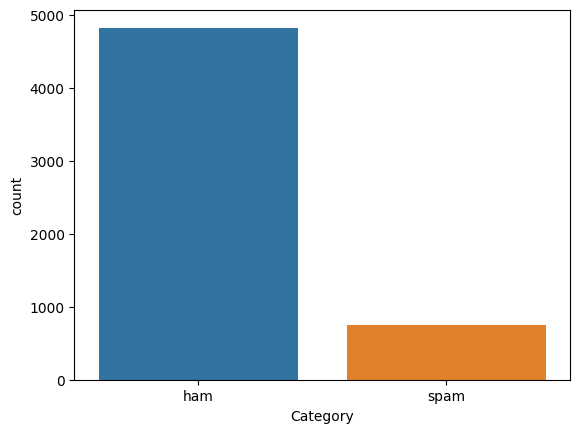

In [45]:
import seaborn as sns
sns.countplot(x='Category',data=df)

In [46]:
df['Category'] = df['Category'].map({ 'ham': 1, 'spam':0 })
df

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [47]:
emails = df.Message
emails

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [48]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
from nltk import TweetTokenizer
tk = TweetTokenizer()
emails = emails.apply(lambda line:tk.tokenize(line)).apply(lambda token:" ".join(token))
emails

0       Go until jurong point , crazy .. Available onl...
1                         Ok lar ... Joking wif u oni ...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor ... U c already then sa...
4       Nah I don't think he goes to usf , he lives ar...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will ü b going to esplanade fr home ?
5569    Pity , * was in mood for that . So ... any oth...
5570    The guy did some bitching but I acted like i'd...
5571                          Rofl . Its true to its name
Name: Message, Length: 5572, dtype: object

Remove Special characters :

In [50]:
emails = emails.str.replace('[^a-zA-Z0-9]+'," ")
emails

<ipython-input-50-da877a9ad529>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  emails = emails.str.replace('[^a-zA-Z0-9]+'," ")


0       Go until jurong point crazy Available only in ...
1                                Ok lar Joking wif u oni 
2       Free entry in 2 a wkly comp to win FA Cup fina...
3            U dun say so early hor U c already then say 
4       Nah I don t think he goes to usf he lives arou...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                   Will b going to esplanade fr home 
5569    Pity was in mood for that So any other suggest...
5570    The guy did some bitching but I acted like i d...
5571                            Rofl Its true to its name
Name: Message, Length: 5572, dtype: object

Stemming :

In [51]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
emails = emails.apply(lambda line:[stemmer.stem(token.lower()) for token in tk.tokenize(line)]).apply(lambda token:" ".join(token))
emails

0       go until jurong point crazi avail onli in bugi...
1                                   ok lar joke wif u oni
2       free entri in 2 a wkli comp to win fa cup fina...
3             u dun say so earli hor u c alreadi then say
4       nah i don t think he goe to usf he live around...
                              ...                        
5567    this is the 2nd time we have tri 2 contact u u...
5568                        will b go to esplanad fr home
5569       piti was in mood for that so ani other suggest
5570    the guy did some bitch but i act like i d be i...
5571                              rofl it true to it name
Name: Message, Length: 5572, dtype: object

Removing stopwords :

In [52]:
from nltk.corpus import stopwords
sw = stopwords.words('english')
emails = emails.apply(lambda line:[token for token in tk.tokenize(line) if token not in sw]).apply(lambda token:" ".join(token))
emails

0       go jurong point crazi avail onli bugi n great ...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkts 2...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u u 750 pound prize 2 c...
5568                                b go esplanad fr home
5569                                piti mood ani suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

Vectorization :

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
data = vec.fit_transform(emails)

In [54]:
print(data)

  (0, 6847)	0.19121480840924043
  (0, 1083)	0.3461524577970114
  (0, 3092)	0.16227758874249107
  (0, 1858)	0.2924309951446324
  (0, 1626)	0.33043993722924453
  (0, 3821)	0.2924309951446324
  (0, 7019)	0.23205001816527493
  (0, 3130)	0.19086090783196946
  (0, 1628)	0.2924309951446324
  (0, 4687)	0.1656188182724773
  (0, 1269)	0.2589107494914645
  (0, 2062)	0.268071250513744
  (0, 4991)	0.2363602166124028
  (0, 3711)	0.3461524577970114
  (0, 3053)	0.13875808694628775
  (1, 4685)	0.564793662023427
  (1, 6942)	0.44597659211687757
  (1, 3678)	0.4745440766926726
  (1, 3852)	0.4218982744467187
  (1, 4659)	0.2809319560263009
  (2, 378)	0.15083562166057216
  (2, 79)	0.23459629769390664
  (2, 1154)	0.1670067648932676
  (2, 5251)	0.16134337840961163
  (2, 6573)	0.12385111982620076
  :	:
  (5567, 4687)	0.1737957421615665
  (5568, 2596)	0.6650056778292512
  (5568, 2879)	0.5738678852280512
  (5568, 3338)	0.3744439687897732
  (5568, 3053)	0.29704345304299484
  (5569, 4942)	0.6038288697475673
  (5569,

In [55]:
data.shape

(5572, 7168)

5572 = number of rows ,
7168 = number of columns, ie, unique words in these 5572 lines

abv "print(data)" shows : (row_index,column_index) numerical_value_after_vectorization

In [56]:
y = df['Category']
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.3,random_state=1)

In [58]:
X_train.shape

(3900, 7168)

In [59]:
y_train.shape

(3900,)

Classifiers

Importing necessary libraries and applying different algorithms all at the same time using for loop :

******************************** RandomForestClassifier(random_state=13) ********************************
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       230
           1       0.98      1.00      0.99      1442

    accuracy                           0.98      1672
   macro avg       0.98      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672

******************************** AdaBoostClassifier(random_state=13) ********************************
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       230
           1       0.97      0.99      0.98      1442

    accuracy                           0.97      1672
   macro avg       0.95      0.91      0.93      1672
weighted avg       0.97      0.97      0.97      1672

******************************** KNeighborsClassifier() ********************************
              precision    recall  f1-score   sup

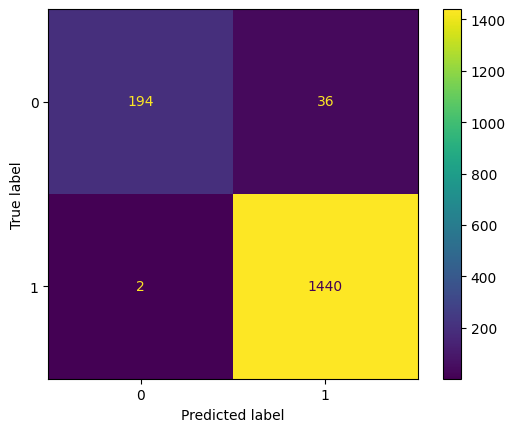

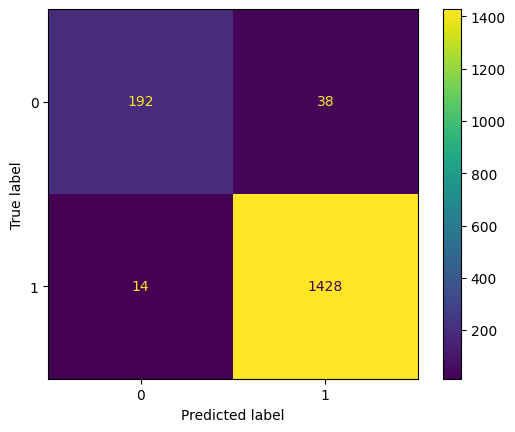

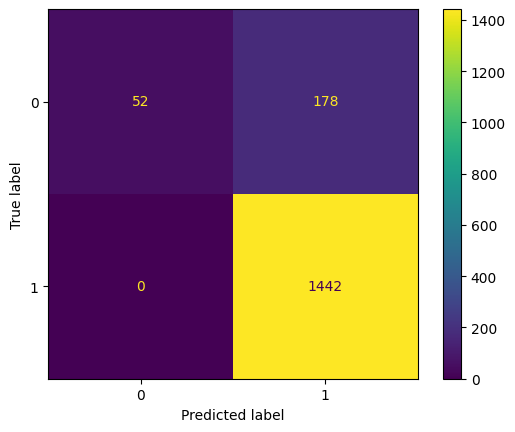

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import ConfusionMatrixDisplay, classification_report

rf = RandomForestClassifier(random_state=13)
ad = AdaBoostClassifier(random_state = 13)
knn = KNeighborsClassifier()


models = [rf,ad,knn]

for model in models:
  print("********************************",model,"********************************")
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

Regressors

In [61]:
from sklearn.metrics import accuracy_score, mean_absolute_error,mean_squared_error,r2_score
import numpy as np

from sklearn.linear_model import LogisticRegression

lor = LogisticRegression()

lor.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print("R2_score : ",r2_score(y_test,y_pred)*100)
print("MeanAbsoluteError : ",mean_absolute_error(y_test,y_pred))
print("MeanSquaredError : ",mean_squared_error(y_test,y_pred))
print("RootMeanSquaredError : ",np.sqrt(mean_squared_error(y_test,y_pred)))

R2_score :  10.26472893927517
MeanAbsoluteError :  0.10645933014354067
MeanSquaredError :  0.10645933014354067
RootMeanSquaredError :  0.3262810600441599
